## **California Housing Price**

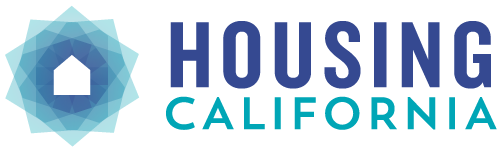

In [2]:
from IPython.display import Image, display
display(Image(filename=r"C:\Users\rinda\Documents\Purwadhika School\JCDS_2804_DATA SCIENCE\Modul 3_CAPSTONE PROJECT\Housing California LOGO.png"))

### **Contents**

1. Business Problem Understanding
2. Import Library and Dataset
3. Data Preparation
4. Exploratory Data Analysis (EDA)
5. Correlations
6. Preprocessing
7. Preparing Dataset
8. Modelling
9. Evaluation
10. Conclusion
11. Recommendation

****

## **1. Business Problem Understanding**

**Context**

Manusia memiliki tiga kebutuhan pokok: sandang (pakaian), pangan (makanan), dan papan (tempat tinggal). Di antara ketiganya, kebutuhan akan papan tercermin melalui kepemilikan properti seperti rumah. Harga rumah sangat bervariasi di setiap negara, dan saat ini Amerika Serikat termasuk salah satu negara dengan harga properti tertinggi di dunia.

California, sebagai salah satu negara bagian di Amerika Serikat, memiliki populasi lebih dari 39,2 juta jiwa dan luas wilayah sekitar 423.970 km² (163.696 mil persegi). Dengan angka tersebut, California menjadi negara bagian terpadat di AS dan menduduki peringkat ketiga dalam hal kepadatan penduduk menurut wilayah. Di tingkat global, California juga tercatat sebagai entitas subnasional terpadat ke-34 di dunia.

Dalam upaya memahami dinamika pasar properti, salah satu lembaga riset yaitu Miller Samuel Inc., telah melakukan pendataan selama beberapa tahun terakhir. Lembaga ini secara khusus mengumpulkan informasi penjualan rumah mewah, termasuk rumah keluarga tunggal dan kondominium dengan nilai transaksi di atas USD 50 juta, khususnya di wilayah Amerika Serikat.

**Problem Statement**   

Dalam proyek ini, seorang pengembang properti di wilayah California menghadapi tantangan dalam meningkatkan pendapatan dan keuntungan perusahaan. Salah satu penyebab utama permasalahan tersebut adalah strategi pemasaran yang kurang efektif. Pengembang tersebut menerapkan pendekatan seragam dengan membangun seluruh tipe rumah tanpa mempertimbangkan preferensi pasar dan daya beli masyarakat.

Untuk mengatasi permasalahan ini, pengembang perlu melakukan analisis dan prediksi harga rumah secara lebih akurat. Tujuannya adalah untuk menetapkan harga jual yang kompetitif dan tetap sesuai dengan kemampuan finansial masyarakat setempat. Dengan strategi harga yang tepat sasaran, diharapkan perusahaan dapat meningkatkan daya tarik pasar dan tetap memperoleh margin keuntungan yang optimal dari setiap penjualan rumah.

**Goals**   

Sebagai solusi atas permasalahan tersebut, akan sangat membantu jika pihak Developer Properti memiliki sistem berbasis aplikasi yang mampu memprediksi harga rumah secara otomatis berdasarkan data demografis. Dengan adanya sistem ini, proses analisis data tidak perlu lagi dilakukan secara manual, sehingga dapat mempercepat pengambilan keputusan dalam merancang strategi pemasaran yang lebih efektif dan efisien.

**Analytic Approach**   

Langkah awal dalam analisis data adalah dengan mengidentifikasi pola dari masing-masing fitur yang tersedia serta mengenali perbedaan karakteristik antar wilayah perumahan.

Setelah itu, akan dikembangkan sebuah aplikasi berbasis model regresi yang dirancang untuk membantu Developer Properti dalam memprediksi harga rumah yang akan dibangun. Tujuannya adalah untuk mengestimasi anggaran pembangunan secara optimal, sehingga tetap memperoleh keuntungan maksimal dengan penawaran harga yang kompetitif di pasar lokal.


**Metric Evaluation**  

Dalam proses evaluasi model regresi, digunakan beberapa metrik seperti RMSE, MAE, MAPE, dan R-Squared. RMSE (Root Mean Squared Error) merepresentasikan rata-rata akar kuadrat dari selisih antara nilai prediksi dan nilai aktual. MAE (Mean Absolute Error) menunjukkan rata-rata dari selisih absolut, sedangkan MAPE (Mean Absolute Percentage Error) mengukur rata-rata kesalahan dalam bentuk persentase.

Semakin kecil nilai RMSE, MAE, dan MAPE yang diperoleh, maka semakin tinggi pula akurasi model dalam memprediksi harga properti berdasarkan fitur yang tersedia.

R-Squared digunakan untuk mengukur sejauh mana model mampu menjelaskan varians dari data target. Nilai R-Squared yang mendekati 1 mengindikasikan model memiliki kemampuan representasi yang baik terhadap data observasi. Namun, perlu dicatat bahwa metrik ini kurang sesuai untuk mengevaluasi model non-linear.

## **Data Understanding**

Data ini berkaitan dengan rumah-rumah yang terdapat di suatu distrik di California, serta beberapa statistik ringkasan yang didasarkan pada data sensus tahun 1990.

| **Attribute**        | **Data Type** | **Description**                                                           |
| -------------------- | ------------- | ------------------------------------------------------------------------- |
| `longitude`          | Float         | Longitude coordinates                                                     |
| `latitude`           | Float         | Latitude coordinates                                                      |
| `housing_median_age` | Float         | Median age of a house within a block                                      |
| `total_rooms`        | Float         | Total number of rooms within a block                                      |
| `total_bedrooms`     | Float         | Total number of bedrooms within a block                                   |
| `population`         | Float         | Total number of people residing within a block                            |
| `households`         | Float         | A group of people residing within a home unit, for a block                |
| `median_income`      | Float         | Median income for households within a block (in tens of thousands of USD) |
| `median_house_value` | Float         | Median house value for households within a block (in US Dollars)          |
| `ocean_proximity`    | Object        | Location of the house with respect to the ocean or sea                    |


## 2. Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score, mean_absolute_error,\
mean_absolute_percentage_error, mean_squared_error

## Import Dataset

In [4]:
df=pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [5]:
df.shape

(14448, 10)

## 3. Data Preparation

In [6]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14443    False
14444    False
14445    False
14446    False
14447    False
Length: 14448, dtype: bool

In [8]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
dtype: object

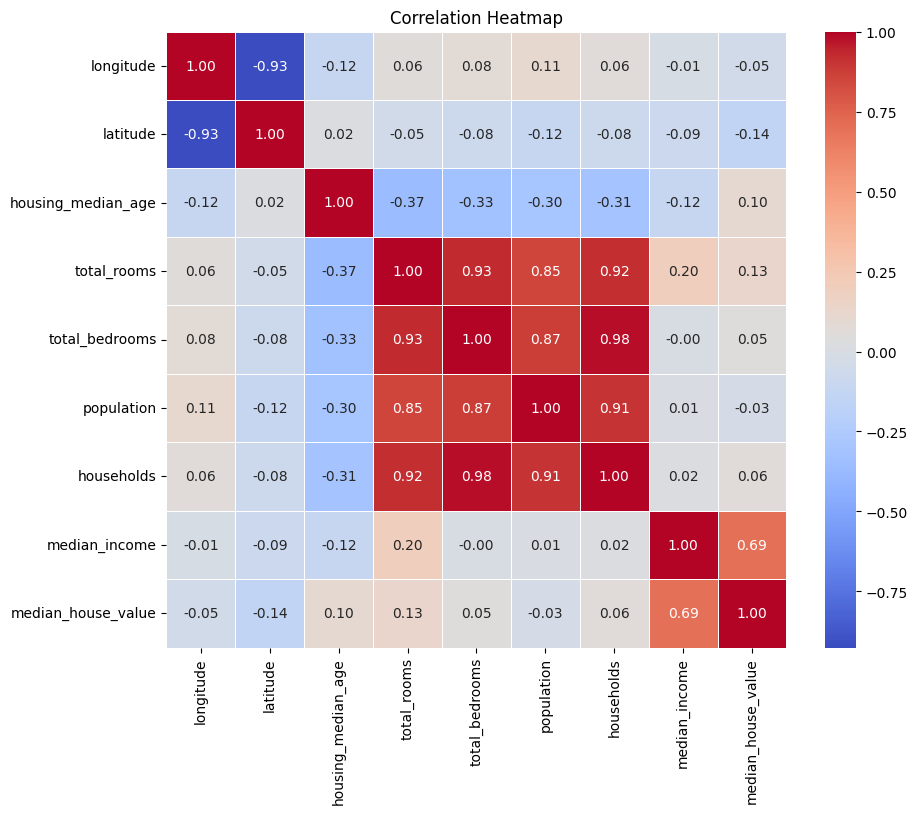

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

<Axes: >

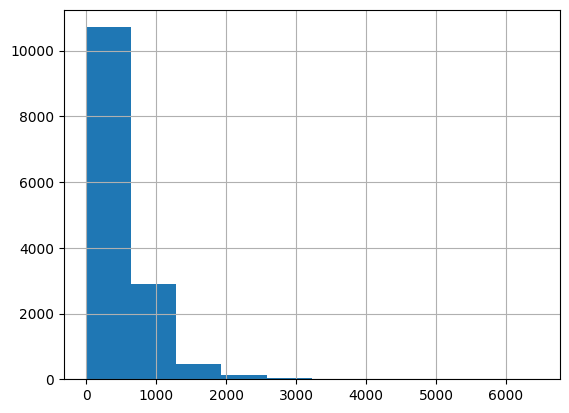

In [11]:
df.total_bedrooms.hist()

In [12]:
df.total_bedrooms.fillna(df.total_bedrooms.median(), inplace=True)
df.isna().sum()

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\4272249996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.total_bedrooms.fillna(df.total_bedrooms.median(), inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [13]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

## 4. Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\3015243394.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['longitude'], ax = ax[0,0])
C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\3015243394.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['latitude'], ax = ax[0,1])
C:\Users\

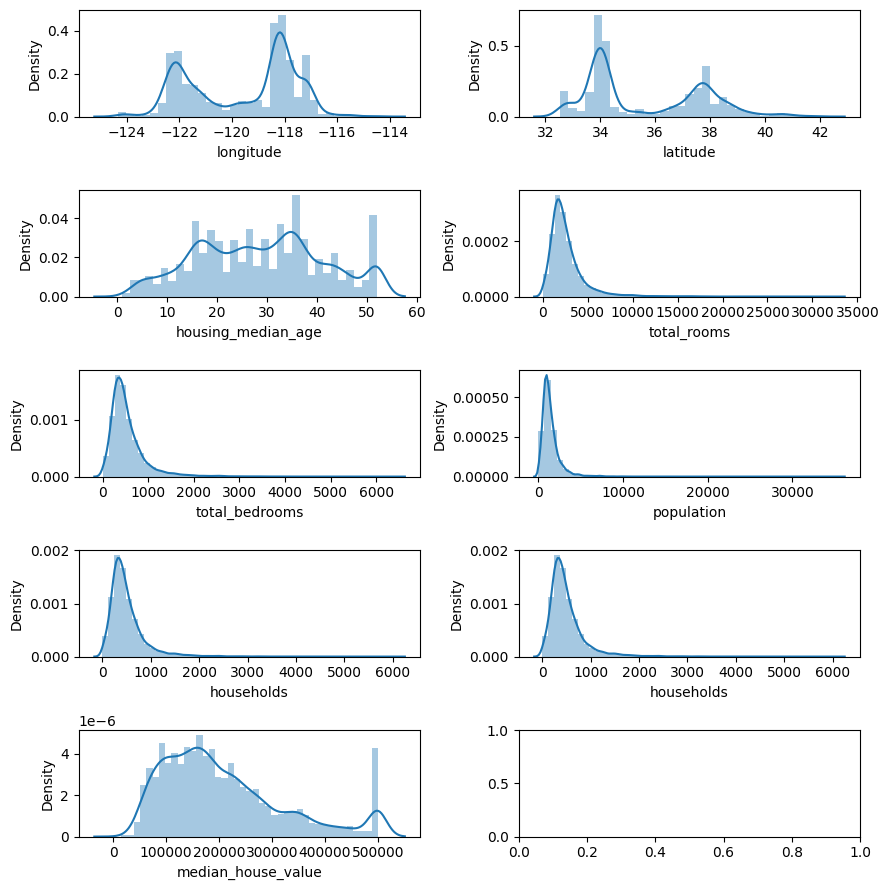

In [15]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['longitude'], ax = ax[0,0]) 
sns.distplot(df['latitude'], ax = ax[0,1]) 
sns.distplot(df['housing_median_age'], ax = ax[1,0]) 
sns.distplot(df['total_rooms'], ax = ax[1,1]) 
sns.distplot(df['total_bedrooms'], ax = ax[2,0]) 
sns.distplot(df['population'], ax = ax[2,1]) 
sns.distplot(df['households'], ax = ax[3,0]) 
sns.distplot(df['households'], ax = ax[3,1]) 
sns.distplot(df['median_house_value'], ax = ax[4,0]) 
plt.tight_layout()
plt.show()

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\1818518293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


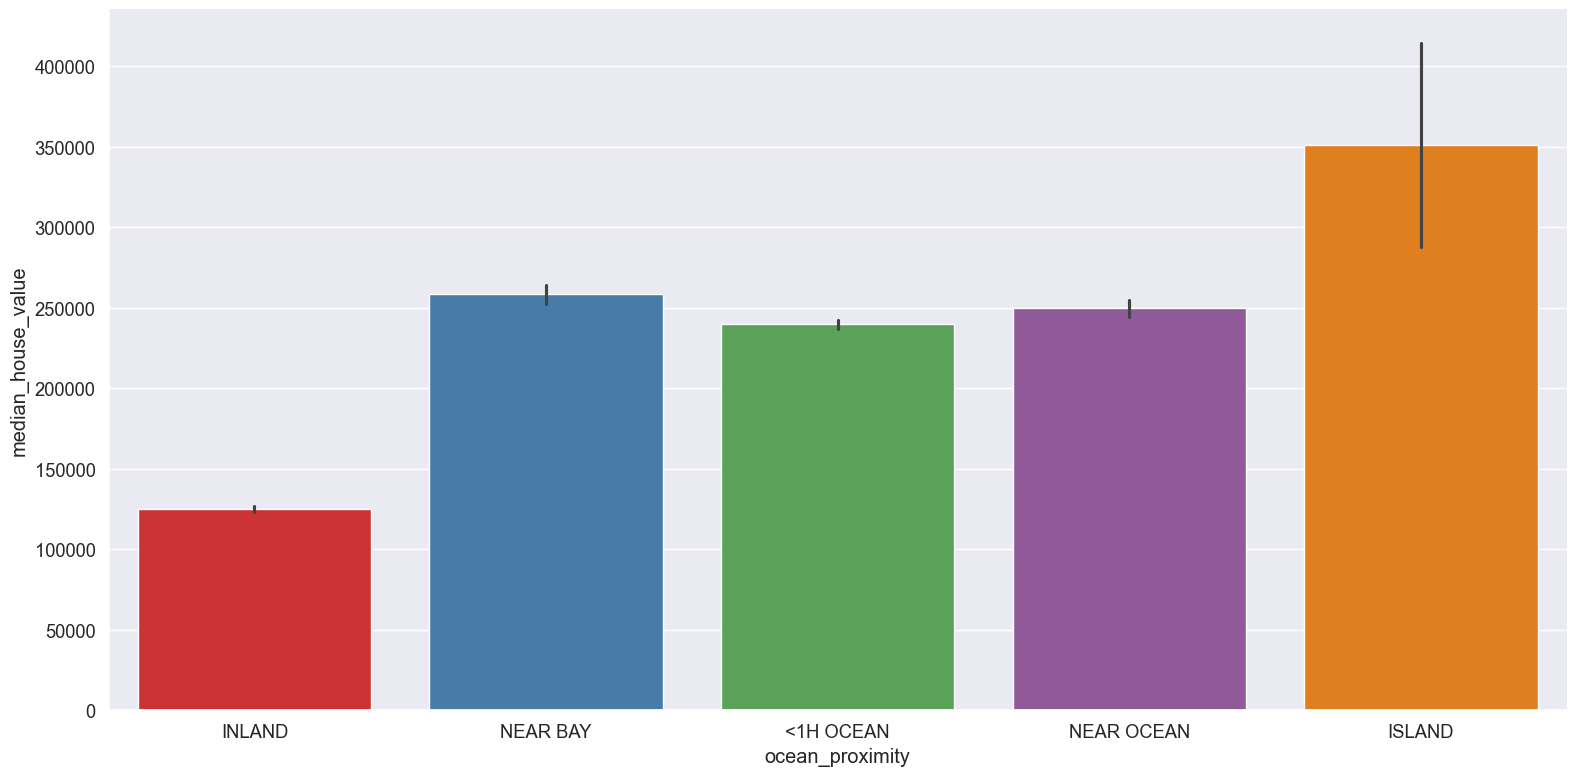

In [16]:
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.2)
sns.catplot(
    x='ocean_proximity',
    y='median_house_value',
    kind='bar',
    data=df,
    palette='Set1',
    height=8,
    aspect=2
)

Text(0.5, 1.0, 'Median House Value Per Area (California)')

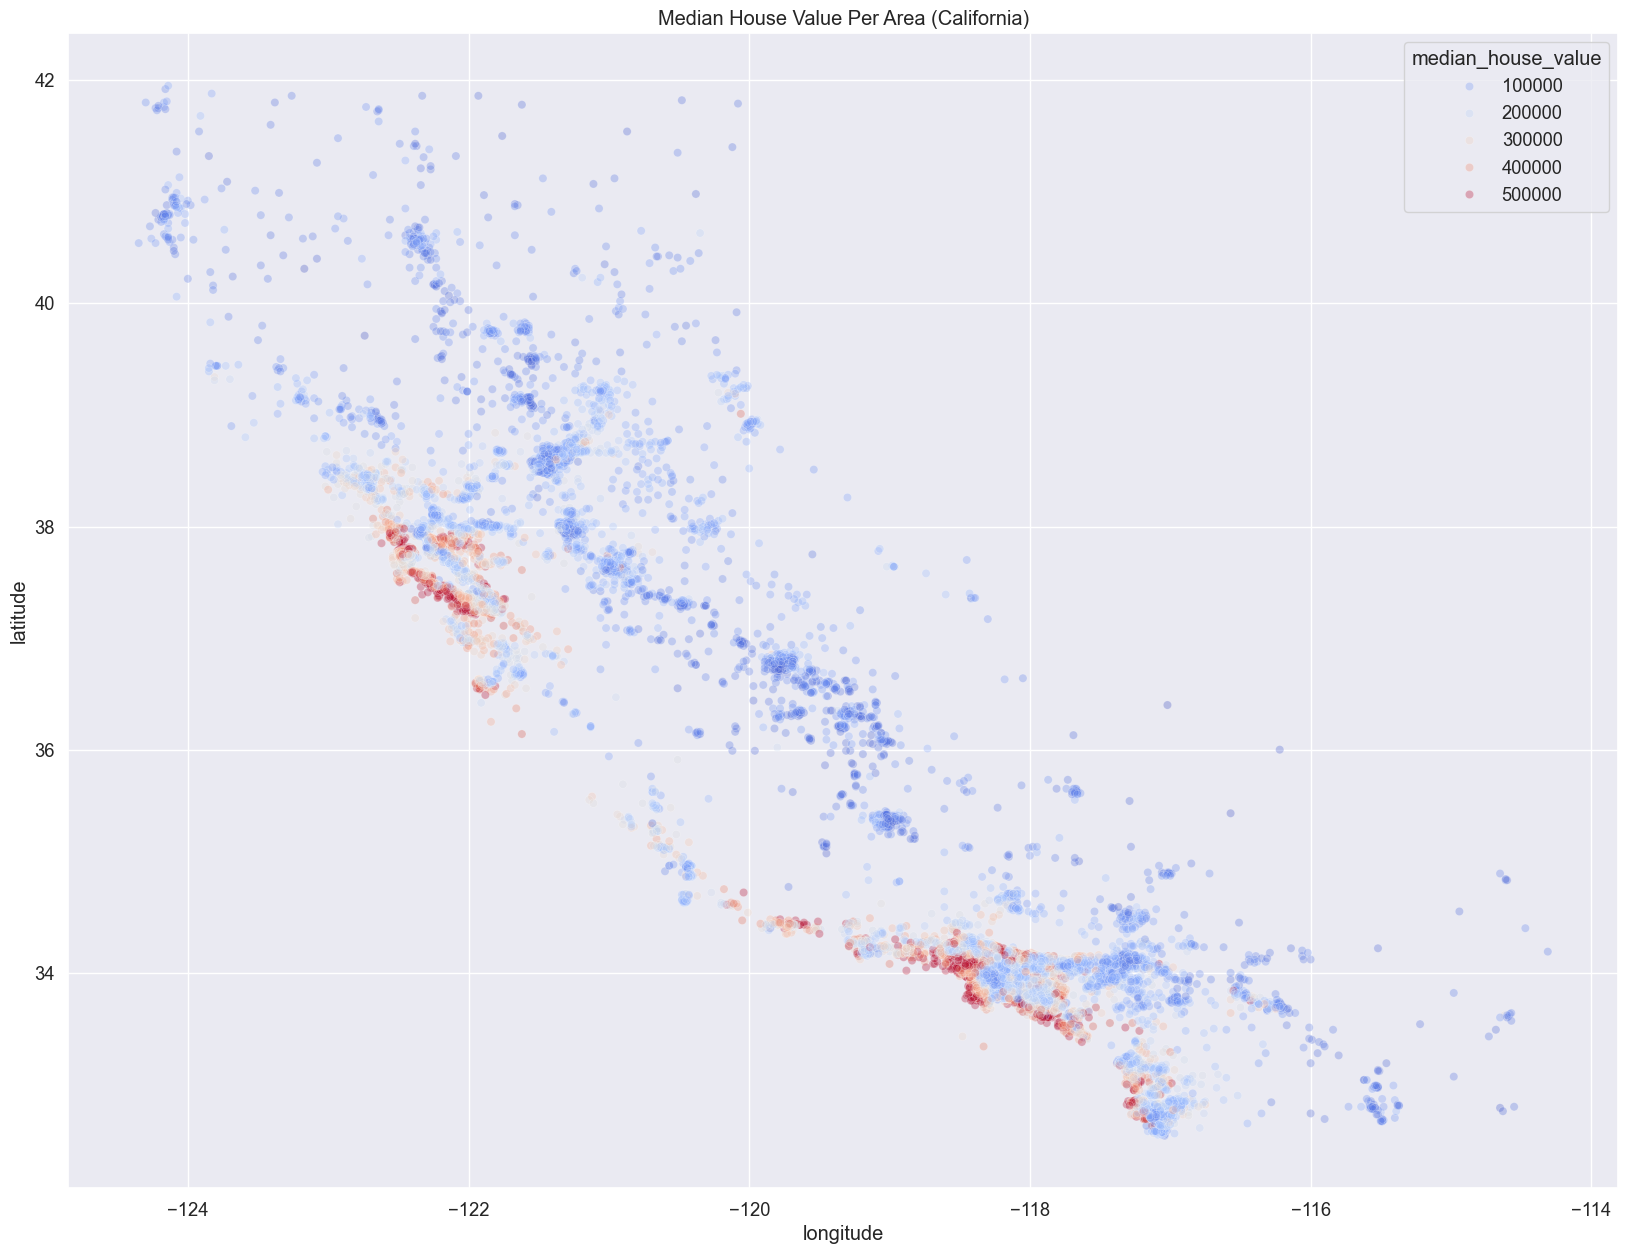

In [17]:
sns.set(rc={'figure.figsize': [20, 15]}, font_scale=1.2)
ax = sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.3)
ax.set_title("Median House Value Per Area (California)")

## 5. Correlations

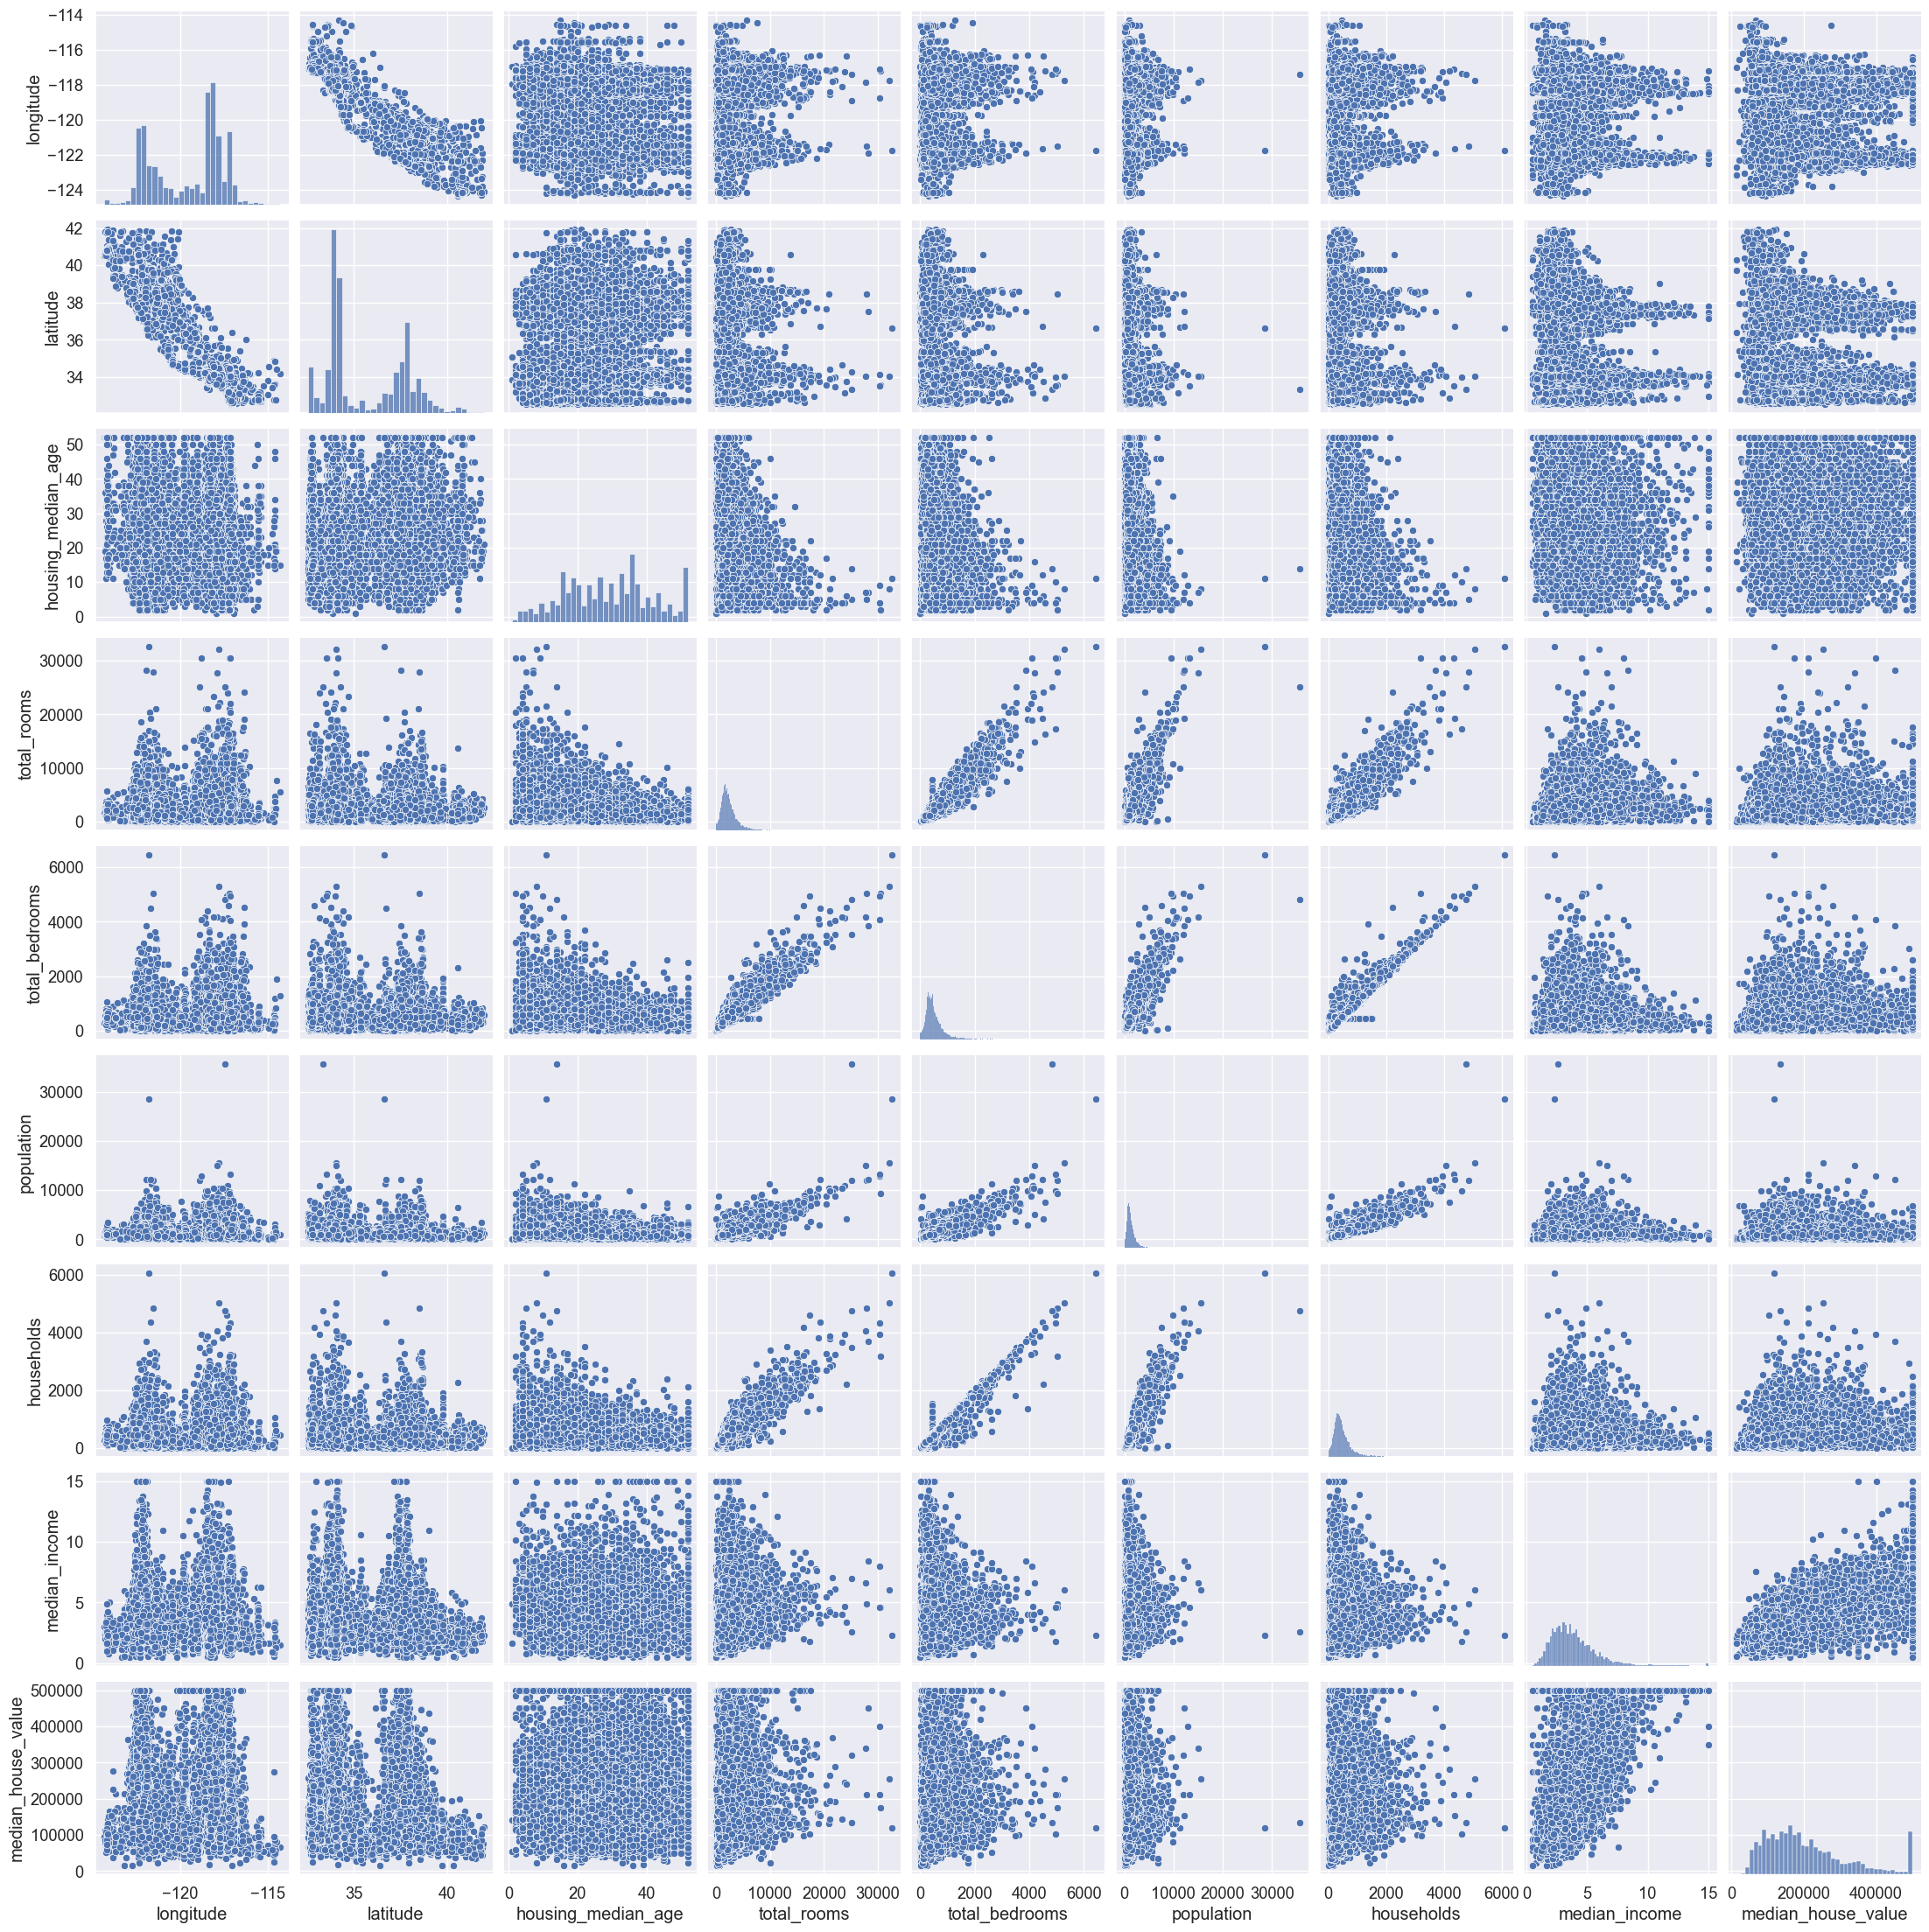

In [18]:
sns.pairplot(data=df)

## 6. Preprocessing

### Missing Value

In [19]:
df=df.dropna(how='all')

### Outliers

In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\2452034657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="longitude", palette="Blues")


<Axes: xlabel='longitude'>

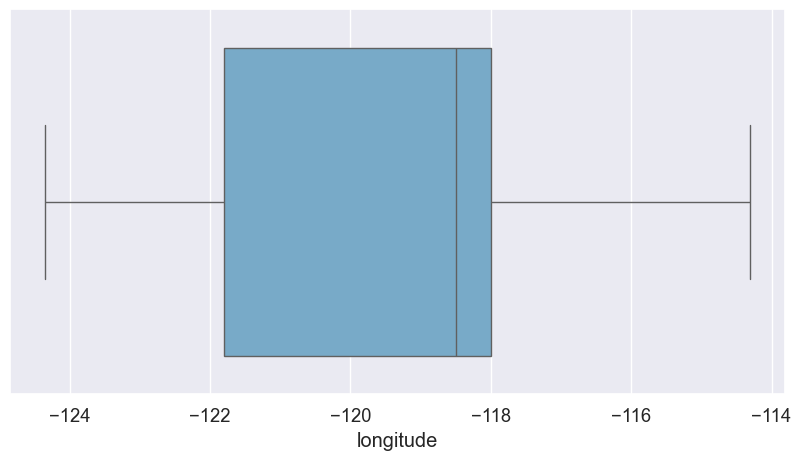

In [21]:
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.2)
sns.boxplot(data=df,x="longitude", palette="Blues")

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\1486344633.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="latitude", palette="Blues")


<Axes: xlabel='latitude'>

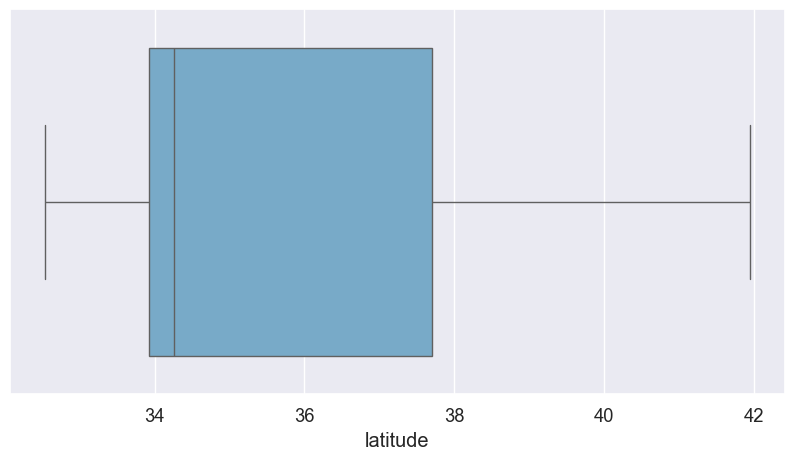

In [22]:
sns.boxplot(data=df,x="latitude", palette="Blues")

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\3479742005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="housing_median_age", palette="Blues")


<Axes: xlabel='housing_median_age'>

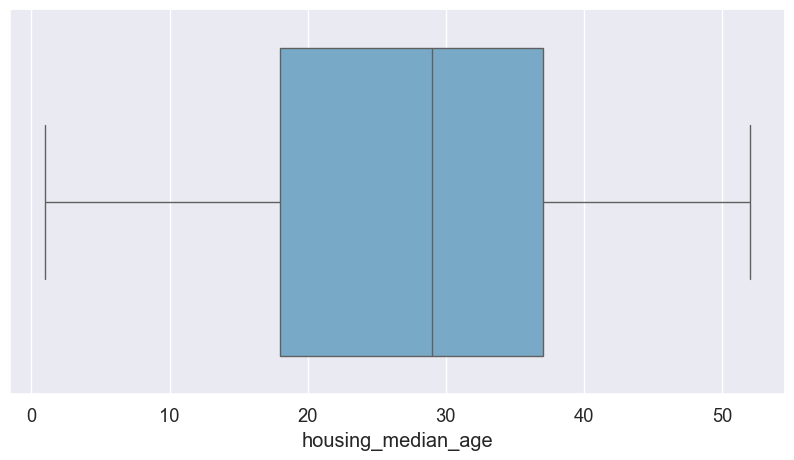

In [23]:
sns.boxplot(data=df,x="housing_median_age", palette="Blues")

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\2486691324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="total_rooms", palette="Blues")


<Axes: xlabel='total_rooms'>

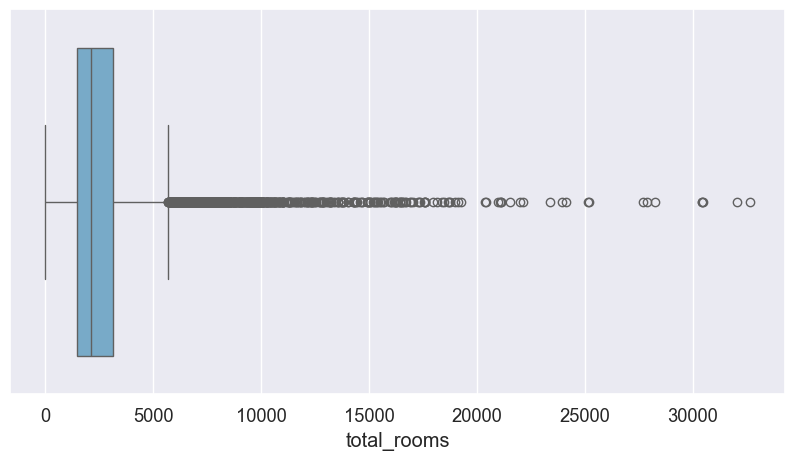

In [24]:
sns.boxplot(data=df,x="total_rooms", palette="Blues")

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\2439714427.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="total_bedrooms", palette="Blues")


<Axes: xlabel='total_bedrooms'>

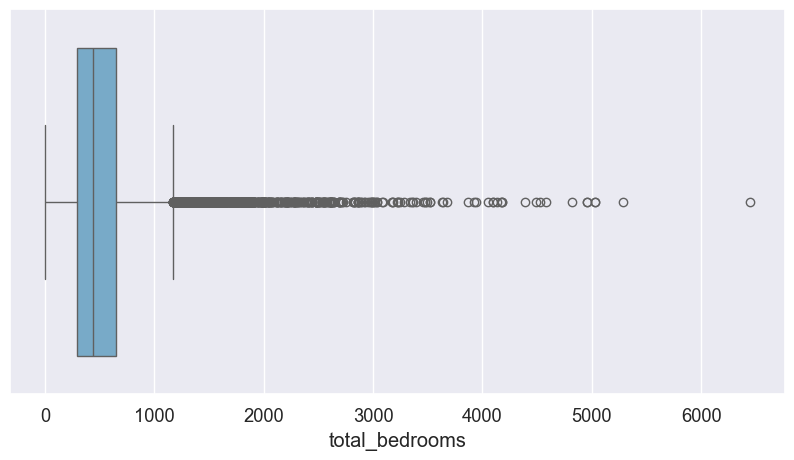

In [25]:
sns.boxplot(data=df,x="total_bedrooms", palette="Blues")

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\774869167.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="population", palette="Blues")


<Axes: xlabel='population'>

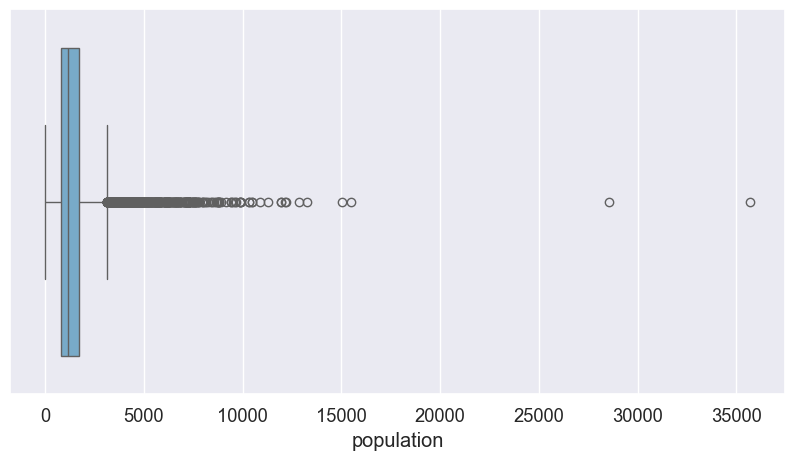

In [26]:
sns.boxplot(data=df,x="population", palette="Blues")

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\1622657170.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="households", palette="Blues")


<Axes: xlabel='households'>

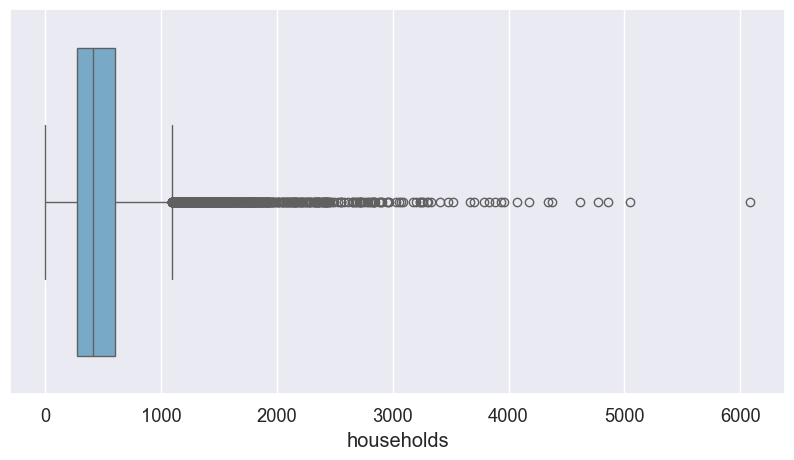

In [27]:
sns.boxplot(data=df,x="households", palette="Blues")

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\3785698188.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="median_income", palette="Blues")


<Axes: xlabel='median_income'>

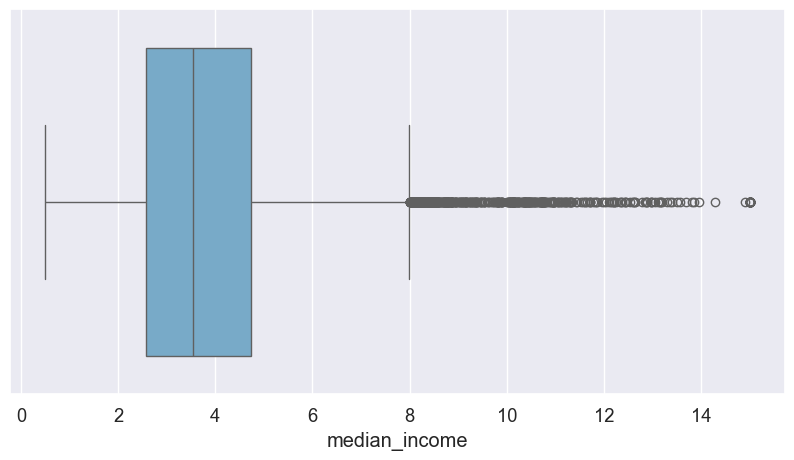

In [28]:
sns.boxplot(data=df,x="median_income", palette="Blues")

C:\Users\rinda\AppData\Local\Temp\ipykernel_29408\1414972672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="median_house_value", palette="Blues")


<Axes: xlabel='median_house_value'>

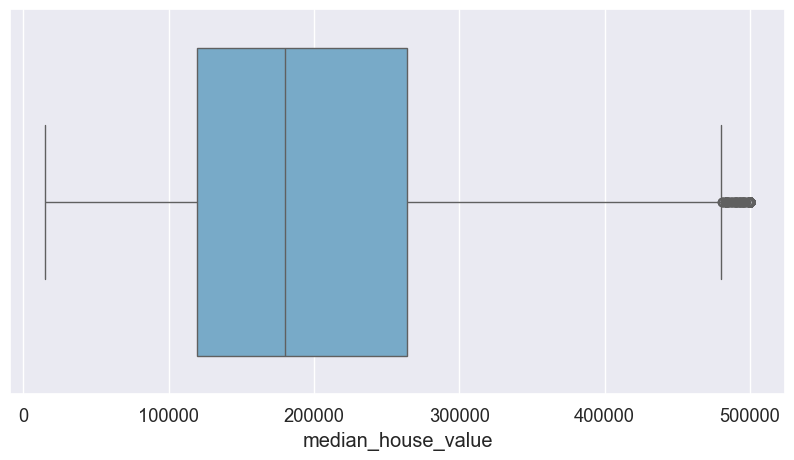

In [29]:
sns.boxplot(data=df,x="median_house_value", palette="Blues")

In [30]:
import sys
print(sys.executable)

c:\Users\rinda\AppData\Local\Programs\Python\Python311\python.exe


In [31]:
!{sys.executable} -m pip install datasist


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import datasist as ds
from datasist.structdata import detect_outliers

In [33]:
outlier= detect_outliers(df,0,[ 'total_rooms', 'total_bedrooms',"population","households","median_income","median_house_value"])
len(outlier)
df.drop(outlier,inplace=True)

In [34]:
df.shape

(12353, 10)

### Ocean Proximity Encode

In [35]:
# One-hot encoding untuk ocean_proximity
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [36]:
print(df_encoded.columns)
print(df_encoded.dtypes)

# Pastikan semua kolom numerik
df_encoded = df_encoded.select_dtypes(include=[np.number])

# Drop NaN dan inf (kalau ada)
df_encoded = df_encoded.replace([np.inf, -np.inf], np.nan).dropna()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object


### Multicollinearity

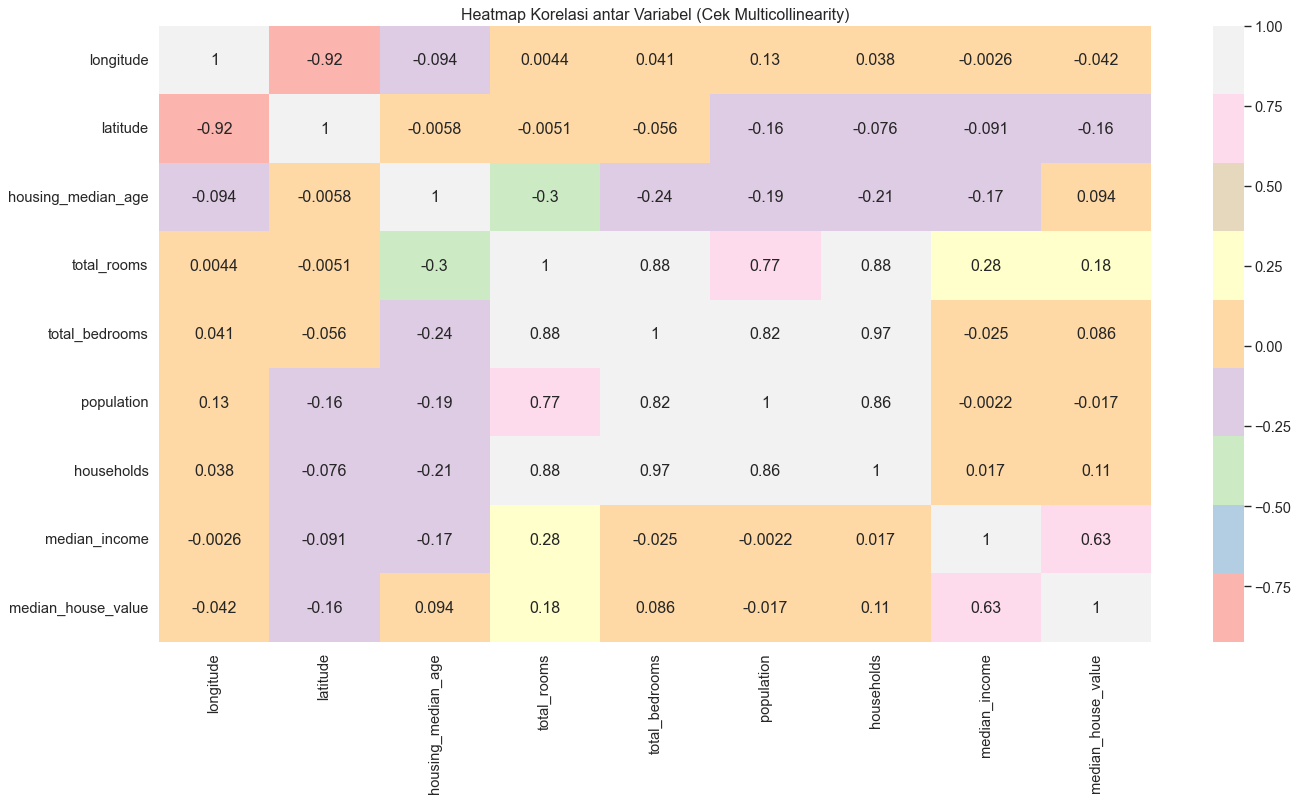

In [37]:
plt.figure(figsize=(20, 10), dpi=80)
sns.heatmap(df_encoded.corr(), cmap="Pastel1", annot=True)
plt.title("Heatmap Korelasi antar Variabel (Cek Multicollinearity)")
plt.show()

## 7. Preparing Dataset

### Splitting the dataset

In [38]:
X = df_encoded.drop("median_house_value", axis=1)
y = df_encoded["median_house_value"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [67]:
# Define the ML models
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

### Feature Scaling

In [40]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 8. Modelling

In [41]:
LR = LinearRegression()
LR.fit(x_train_scaled, y_train)

print(f"Training R2 score = {LR.score(x_train_scaled, y_train):.4f}")
print(f"Test R2 score     = {LR.score(x_test_scaled, y_test):.4f}")

Training R2 score = 0.6009
Test R2 score     = 0.6219


### VIF

In [42]:
# Tambahkan intercept
X_vif = add_constant(X)

# Hitung VIF
vif = pd.Series(
    [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],
    index=X_vif.columns
)

print("VIF per feature:")
print(vif.sort_values(ascending=False))

VIF per feature:
const                 17223.664932
households               21.575237
total_bedrooms           19.885938
total_rooms               9.635868
latitude                  9.598745
longitude                 9.119418
population                4.194735
median_income             2.144144
housing_median_age        1.235877
dtype: float64


In [43]:
# Drop fitur dengan VIF tinggi
X_reduced = X.drop(columns=['households', 'total_bedrooms'])
x_train, x_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=123)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

model = LinearRegression()
selector = RFECV(model, cv=5)
selector.fit(X_reduced, y)

print(X_reduced.columns[selector.support_])

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'median_income'],
      dtype='object')


In [45]:
# Split dulu data dengan fitur terpilih
selected_features = X_reduced.columns[selector.support_]
X_selected = X_reduced[selected_features]

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=123)

# Fit model
model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Cek R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R² Score (Train): {r2_train:.4f}")
print(f"R² Score (Test): {r2_test:.4f}")

R² Score (Train): 0.5625
R² Score (Test): 0.5716


In [46]:
# Buat parameter grid alpha dari kecil ke besar
from sklearn.model_selection import GridSearchCV
alphas = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

### Lasso

In [47]:
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, alphas, cv=5)
lasso_cv.fit(x_train, y_train)

y_pred_lasso = lasso_cv.predict(x_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Best alpha Lasso:", lasso_cv.best_params_)
print("R2 Score Lasso:", r2_lasso)

Best alpha Lasso: {'alpha': 10}
R2 Score Lasso: 0.5716181707312138


### Ridge

In [48]:
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, alphas, cv=5)
ridge_cv.fit(x_train, y_train)

y_pred_ridge = ridge_cv.predict(x_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Best alpha Ridge:", ridge_cv.best_params_)
print("R2 Score Ridge:", r2_ridge)


Best alpha Ridge: {'alpha': 1}
R2 Score Ridge: 0.5716154390297388


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# ---------- 1) pakai fitur terpilih (tanpa scaling) ----------
selected_cols = ['longitude', 'latitude', 'housing_median_age',
                 'total_rooms', 'population', 'median_income']
X = X_reduced[selected_cols]     # X_reduced sudah kamu buat sebelumnya
y = df_encoded['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---------- 2) baseline Random Forest ----------
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_base.fit(x_train, y_train)
print("Baseline R² (train):", rf_base.score(x_train, y_train))
print("Baseline R² (test) :", rf_base.score(x_test,  y_test))

# ---------- 3) hyper‑parameter tuning ----------
param_dist = {
    "n_estimators":    [200, 400, 800, 1000],
    "max_depth":       [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":  [1, 2, 4],
    "max_features":    ["auto", "sqrt", "log2"]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring="r2",
    random_state=42,
    n_jobs=-1,
    verbose=0
)
search.fit(x_train, y_train)

best_rf = search.best_estimator_
print("\n🔧 Best params :", search.best_params_)
print("Tuned R² (train):", best_rf.score(x_train, y_train))
print("Tuned R² (test) :", best_rf.score(x_test,  y_test))

# ---------- 4) error metrics (optional) ----------
rmse = np.sqrt(mean_squared_error(y_test, best_rf.predict(x_test)))
print("RMSE (test) :", rmse)

# ---------- 5) feature importance ----------
imp = pd.Series(best_rf.feature_importances_, index=selected_cols)\
        .sort_values(ascending=False)
print("\nFeature importance:\n", imp)

Baseline R² (train): 0.967299966204735
Baseline R² (test) : 0.7560724675349151


c:\Users\rinda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rinda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rinda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\rinda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p


🔧 Best params : {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Tuned R² (train): 0.9679880122591031
Tuned R² (test) : 0.7505607755538699
RMSE (test) : 47075.184327028226

Feature importance:
 median_income         0.372334
longitude             0.207371
latitude              0.196684
total_rooms           0.081490
population            0.072443
housing_median_age    0.069678
dtype: float64


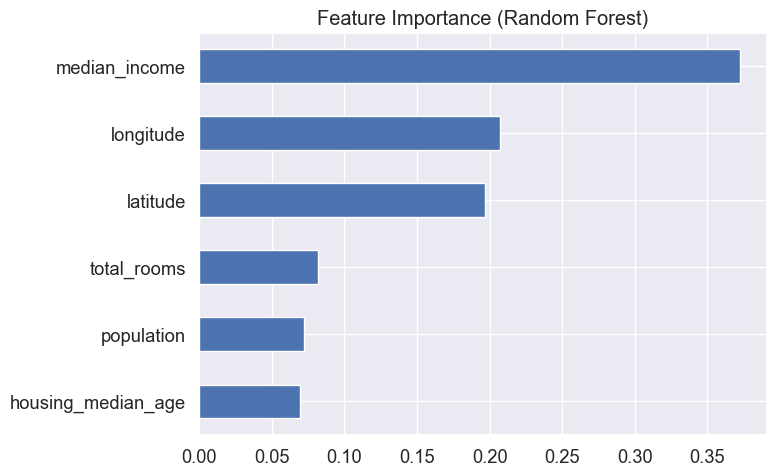

In [50]:
import matplotlib.pyplot as plt

imp = pd.Series(best_rf.feature_importances_, index=selected_cols)\
        .sort_values(ascending=True)

imp.plot(kind='barh', title='Feature Importance (Random Forest)', figsize=(8,5))
plt.tight_layout(); plt.show()

In [51]:
# Misalnya drop fitur paling lemah
X_simple = X_reduced.drop(columns=['housing_median_age'])

# Train lagi
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(x_train_s, y_train_s)

# Evaluate
print("R2 Train :", model.score(x_train_s, y_train_s))
print("R2 Test  :", model.score(x_test_s, y_test_s))


R2 Train : 0.9694700245907379
R2 Test  : 0.7666768690786294


In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Split ulang jika perlu (pakai X_reduced atau yang terbaru)
x_train, x_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Buat model XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(x_train, y_train)

# Prediksi
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

# R2 Score
print(" XGBoost R² Train:", r2_score(y_train, y_train_pred))
print(" XGBoost R² Test :", r2_score(y_test, y_test_pred))


 XGBoost R² Train: 0.8840724582425845
 XGBoost R² Test : 0.7708293602520276


| Model             | R² Train | R² Test | Catatan                                                             |
| ----------------- | -------- | ------- | ------------------------------------------------------------------- |
| **Random Forest** | 0.9695   | 0.7667  | Sangat tinggi di train → kemungkinan **overfitting**                |
| **XGBoost**       | 0.8841   | 0.7708  | Lebih stabil di train vs test (gap kecil) → **lebih generalizable** |


* Kalau hanya lihat R² Test, XGBoost sedikit lebih tinggi dari Random Forest (0.7708 vs 0.7667).
* Random Forest punya skor train yang sangat tinggi (0.9695) tapi gap-nya cukup besar dengan test → tanda overfitting.
* XGBoost punya train-test gap kecil → artinya model lebih stabil dan aman dipakai ke data baru.

## 9. Evaluation

In [53]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

# Lasso Regression (gunakan alpha terbaik hasil tuning)
lasso = Lasso(alpha=10)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

# Ridge Regression (gunakan alpha terbaik hasil tuning)
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [54]:
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, 
    mean_absolute_percentage_error, mean_squared_log_error
)
import numpy as np

def get_metrics(p, y_true, y_pred):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mspe = np.mean(np.square((y_true - y_pred) / y_true))  # Mean Squared Percentage Error
    try:
        msle = mean_squared_log_error(y_true, y_pred)
    except:
        msle = np.nan  # MSLE only works with non-negative predictions
    
    return r2, adjusted_r2, mae, mse, rmse, mape, mspe, msle

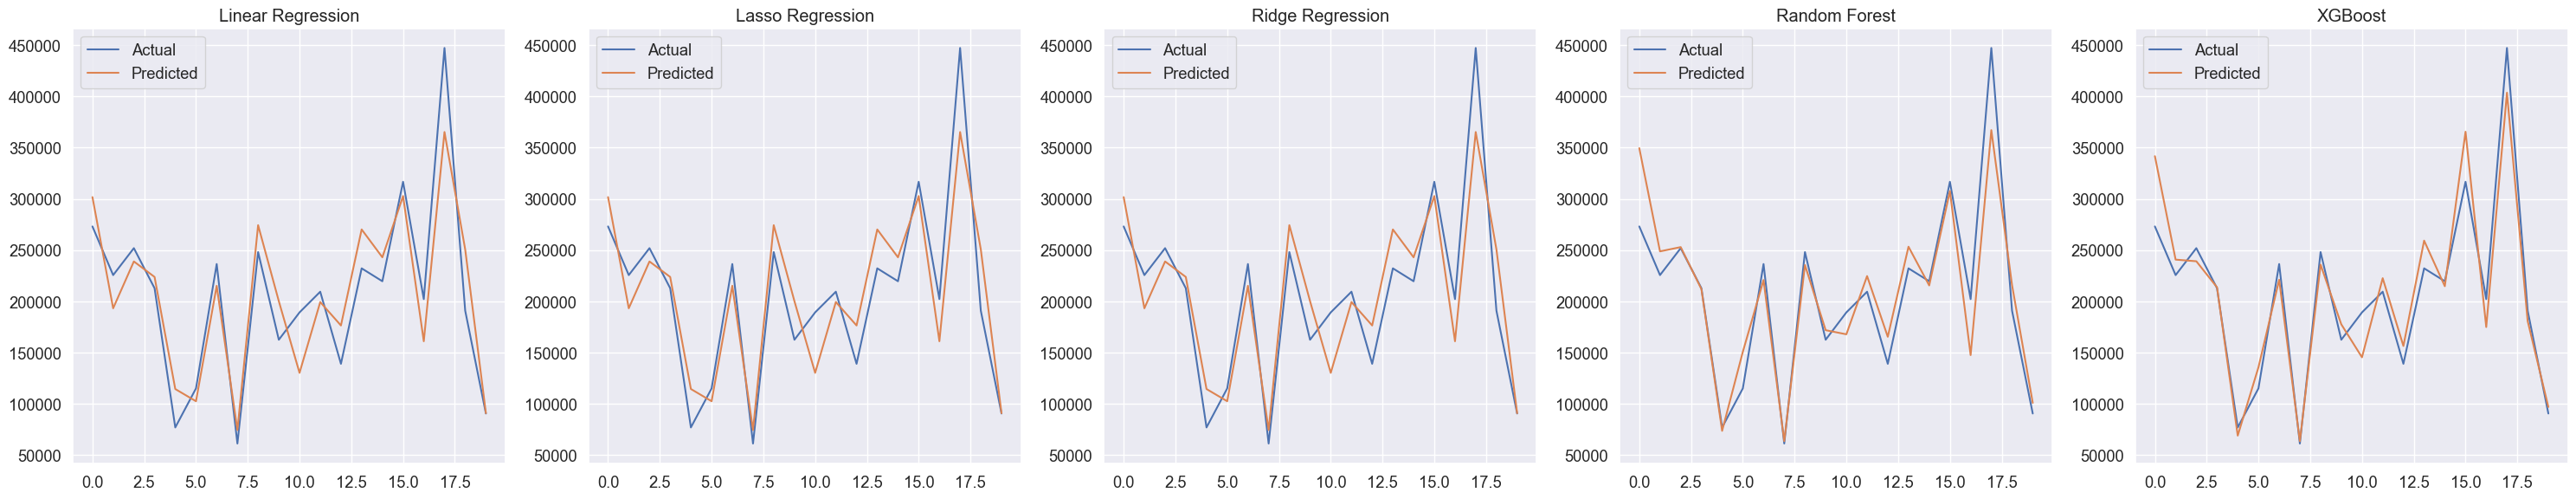

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot perbandingan hasil prediksi semua model (20 data pertama)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 6))

# Linear Regression
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr}).reset_index(drop=True)
axes[0].plot(df_lr[:20])
axes[0].set_title("Linear Regression")
axes[0].legend(["Actual", "Predicted"], loc="upper left")

# Lasso
df_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso}).reset_index(drop=True)
axes[1].plot(df_lasso[:20])
axes[1].set_title("Lasso Regression")
axes[1].legend(["Actual", "Predicted"], loc="upper left")

# Ridge
df_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge}).reset_index(drop=True)
axes[2].plot(df_ridge[:20])
axes[2].set_title("Ridge Regression")
axes[2].legend(["Actual", "Predicted"], loc="upper left")

# Random Forest
df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf}).reset_index(drop=True)
axes[3].plot(df_rf[:20])
axes[3].set_title("Random Forest")
axes[3].legend(["Actual", "Predicted"], loc="upper left")

# XGBoost
df_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb}).reset_index(drop=True)
axes[4].plot(df_xgb[:20])
axes[4].set_title("XGBoost")
axes[4].legend(["Actual", "Predicted"], loc="upper left")

plt.tight_layout()
plt.show()


In [56]:
p = x_train.shape[1]

pd.DataFrame([
    get_metrics(p, y_test, y_pred_lr),      
    get_metrics(p, y_test, y_pred_lasso),   
    get_metrics(p, y_test, y_pred_ridge),   
    get_metrics(p, y_test, y_pred_rf),      
    get_metrics(p, y_test, y_pred_xgb)      
], 
columns=['R2', 'Adjusted R2', 'MAE', 'MSE', 'RMSE', 'MAPE', 'MSPE', 'MSLE'],
index=['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
       'Random Forest', 'XGBoost'])

,R2,Adjusted R2,MAE,MSE,RMSE,MAPE,MSPE,MSLE
Linear Regression,0.553106,0.552381,47436.823859,3.970305e+09,63010.353170,0.307648,0.195842,NaN
Lasso Regression,0.553110,0.552385,47435.944400,3.970266e+09,63010.047081,0.307635,0.195802,NaN
Ridge Regression,0.553108,0.552383,47436.399684,3.970286e+09,63010.209248,0.307641,0.195819,NaN
Random Forest,0.756072,0.755677,31346.298732,2.167106e+09,46552.184638,0.182588,0.094068,0.057074
XGBoost,0.775537,0.775173,30017.138326,1.994174e+09,44656.178325,0.176035,0.089792,0.057253


In [70]:
from sklearn.pipeline import Pipeline
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    print(f"\n{name} Performance:")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")


LinearRegression Performance:
MSE: 3970304606.582962
R2 Score: 0.5531060073037378
MAE: 47436.823858984826
MAPE: 0.30764781586040135

Lasso Performance:
MSE: 3970303380.053209
R2 Score: 0.5531061453608475
MAE: 47436.79789196506
MAPE: 0.3076473318635416

Ridge Performance:
MSE: 3970296612.456191
R2 Score: 0.5531069071156124
MAE: 47436.62754579124
MAPE: 0.307643802383896

RandomForest Performance:
MSE: 2161843645.245396
R2 Score: 0.7566647816878105
MAE: 31309.077471667566
MAPE: 0.1822973949283918

XGBoost Performance:
MSE: 1994174262.5550807
R2 Score: 0.7755374998563747
MAE: 30017.13832615185
MAPE: 0.1760351861432001


Insight Per Model (Visual):
1. Linear Regression / Lasso / Ridge:
    * Garis prediksi (oranye) cukup sejajar dengan actual (biru), tetapi:
    * Pola fluktuasi ekstrem (misal naik-turun tajam di data ke-5 dan ke-17) tidak tertangkap dengan baik.
    * Error masih terlihat besar di beberapa titik.

2. Random Forest:
    * Lebih baik menangkap pola fluktuasi tajam, misalnya pada titik 5–6 dan 15–17.
    * Tapi ada beberapa overfitting kecil di awal data (titik 0–3), di mana prediksi agak terlalu tinggi.

3. XGBoost:
    * Menangkap pola lebih smooth dan konsisten, bahkan di titik ekstrem.
    * Mampu mengikuti arah tren lebih akurat daripada model linear.
    * Tidak terlalu overfit seperti Random Forest → good generalization.

| Model                  | R² (Test)  | Overfitting     |
| ---------------------- | ---------- | --------------- |
| Linear / Lasso / Ridge | \~0.57     | Low             |
| **Random Forest**      | \~0.75     | Sedikit         |
| **XGBoost**            | **\~0.77** | Paling seimbang |


## 10. Conclusion

Berdasarkan hasil evaluasi terhadap beberapa model regresi (Linear, Lasso, Ridge, Random Forest, dan XGBoost), dapat disimpulkan bahwa XGBoost Regressor merupakan model dengan performa terbaik. Hal ini didasarkan pada nilai evaluasi sebagai berikut:

* R-squared (R²): 0.775 → tertinggi di antara semua model, menandakan bahwa model mampu menjelaskan variabilitas data dengan sangat baik.
* MAE (Mean Absolute Error): 30,017 → nilai kesalahan rata-rata terkecil.
* RMSE (Root Mean Square Error): 44,656 → paling kecil, menunjukkan akurasi prediksi yang tinggi.
* MAPE (Mean Absolute Percentage Error): 17.6% → error relatif paling kecil, artinya prediksi relatif dekat dengan harga aktual.
* MSPE & MSLE: nilai terbaik di antara model lain.

## 11. Recommendation

**1. Gunakan Model XGBoost Regressor**  
Sebagai algoritma utama dalam sistem prediksi harga rumah karena menunjukkan akurasi dan konsistensi tertinggi di semua metrik evaluasi.

**2. Tentukan Kisaran Harga yang Direkomendasikan**   
Model cocok digunakan untuk memprediksi harga rumah dengan rentang minimum USD 14.999 dan maksimum USD 500.000 agar tetap akurat dan kompetitif.

**3. Tambahkan Fitur Relevan**   
Untuk meningkatkan akurasi, disarankan menambahkan variabel eksternal yang memengaruhi harga seperti:

* Suku bunga pinjaman
* Rata-rata pendapatan rumah tangga terkini
* Tingkat kriminalitas & kualitas sekolah
* Aksesibilitas terhadap fasilitas umum

**4. Perluas Dataset**   
Tambahkan lebih banyak data historis dan real-time dari berbagai wilayah di California untuk menangkap pola pasar yang lebih luas.

**5. Pertimbangkan Pembaruan Model Secara Berkala**  
Karena pasar properti dinamis, pelatihan ulang model secara berkala sangat disarankan untuk menjaga akurasi prediksi.

In [72]:
# Save each model as a pickle file
import pickle
pickle_file = f'{name}_pipeline.pkl'
with open(pickle_file, 'wb') as f:
    pickle.dump(pipeline, f)
print(f"Model saved as {pickle_file}")

Model saved as XGBoost_pipeline.pkl
